In [1]:
import torch
from network import components as lay
from network import functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [2]:
import numpy as np
from IPython.display import clear_output
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load Data

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),  # convert to tensor
    #transforms.Lambda(lambda x: x.view(-1))  # flatten into vector
])

In [4]:
def load_data():
    mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    return mnist_trainset, mnist_testset

In [5]:
train, test = load_data()

# Model

In [6]:
class TestModel(object):
    def __init__(self, input_size, hidden_size, output_size):
        super(TestModel, self).__init__()
        
        self.fc1 = lay.FullyConnected(input_size,hidden_size)
        self.fc2 = lay.FullyConnected(hidden_size,output_size)
        self.relu = lay.ReLu(50)
        self.sigmoid1 = lay.Sigmoid()        
        self.sigmoid2 = lay.Sigmoid()
        self.softmax = lay.Softmax()
        
        return
    
    def forward(self, inp):
        
        flattened_inputs = F.batch_input(inp)
            
        out = self.fc1.forward(flattened_inputs)
        #out = self.sigmoid1.forward(out)
        out = self.relu.forward(out)
        out = self.fc2.forward(out)
        out = self.sigmoid2.forward(out)
        #out = self.softmax.forward(out)
        
        return out
    
    def forward_show(self, inp):
        
        flattened_inputs = F.batch_input(inp)
            
        out = self.fc1.forward(flattened_inputs)
        plt.imshow(out.reshape(8,8))
        plt.show()
        #out = self.sigmoid1.forward(out)
        out = self.relu.forward(out)
        plt.imshow(out.reshape(8,8))
        plt.show()
        out = self.fc2.forward(out)
        out = self.sigmoid2.forward(out)
        #out = self.softmax.forward(out)
        
        return out
    
    def backward(self, loss_grad, lr : float=0.01):
        
        gradient = loss_grad
        gradient = self.sigmoid2.back(gradient)
        #gradient = self.softmax.back(gradient)
        gradient = self.fc2.back(gradient, lr=lr)
        #gradient = self.sigmoid1.back(gradient)
        gradient = self.relu.back(gradient)
        gradient = self.fc1.back(gradient, lr=lr)
    
        return

# Train

In [7]:
model = TestModel(784, 64, 10)
trial = F.TrainManager()
trial.dataloader(train, test)

C:\Users\jugwu\anaconda3\envs\differ\lib\site-packages\numpy\core\fromnumeric.py:2009: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = asarray(a).shape
C:\Users\jugwu\anaconda3\envs\differ\lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


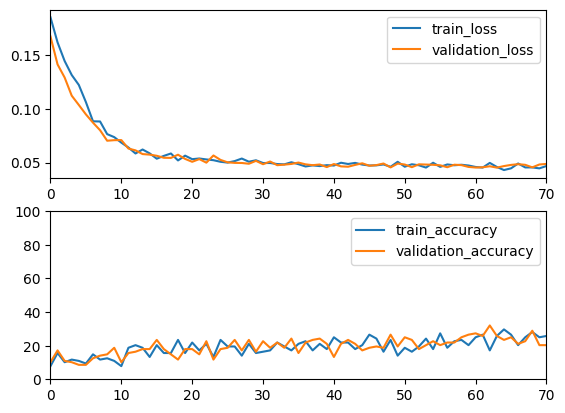

Epoch 0 : { loss: 0.047 } { val loss: 0.049 } { accuracy: 25.8 } { val accuracy: 20.3 }


In [8]:
mseloss = F.MSELoss()
trial.train_batch(model, loss_function=mseloss, epochs=1, lr=0.05, plot=True, num = 70)

# Test

  0%|          | 0/79 [00:00<?, ?it/s]

{ test accuracy: 25.2 }


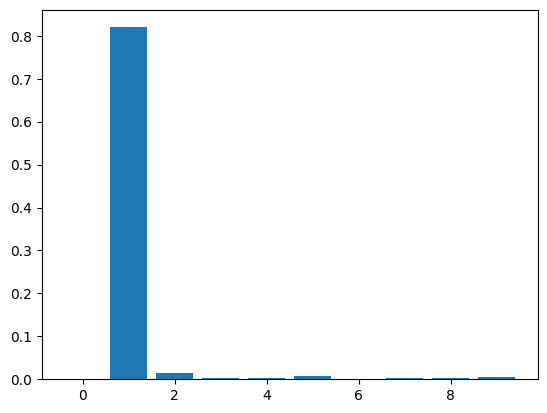

LABEL: tensor(1)


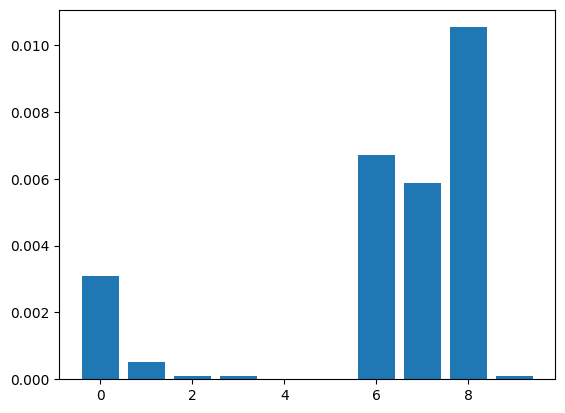

LABEL: tensor(2)


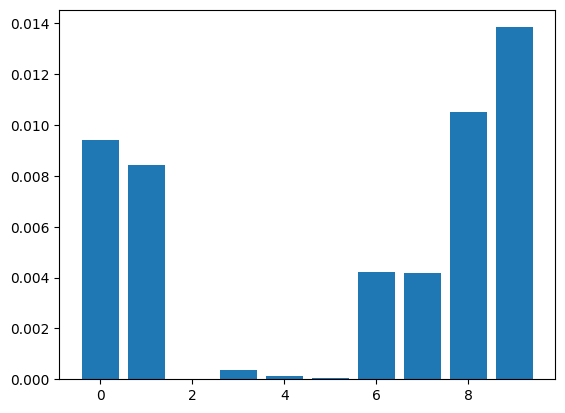

LABEL: tensor(3)


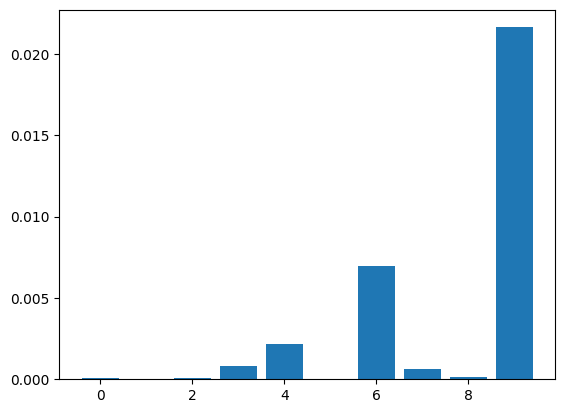

LABEL: tensor(4)


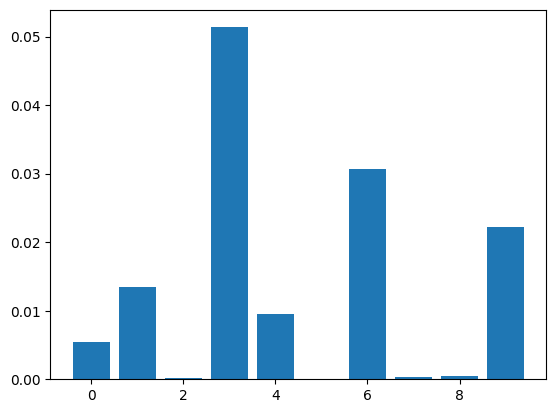

LABEL: tensor(5)


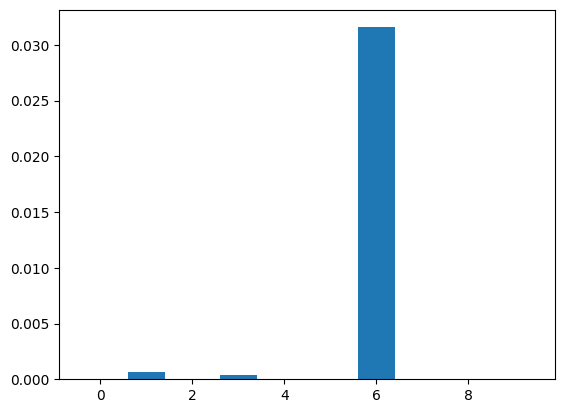

LABEL: tensor(6)


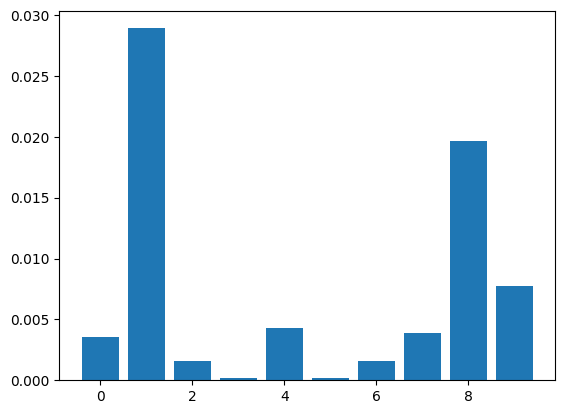

LABEL: tensor(7)


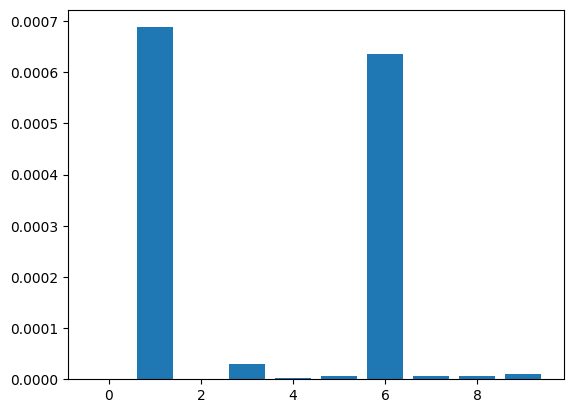

LABEL: tensor(8)


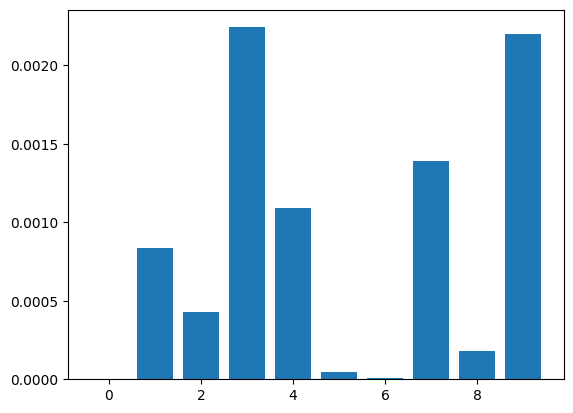

LABEL: tensor(9)


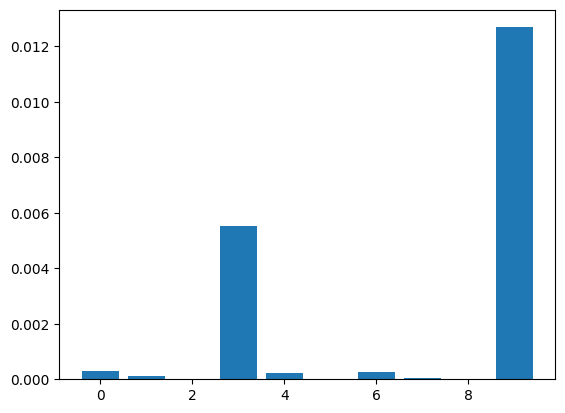

LABEL: tensor(0)


In [9]:
trial.test()

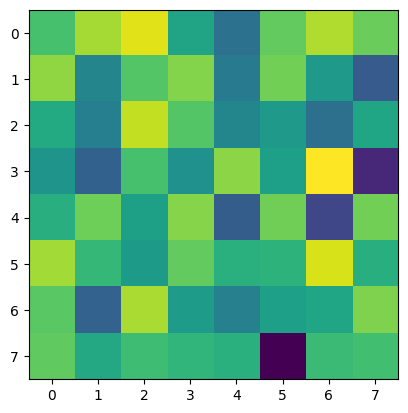

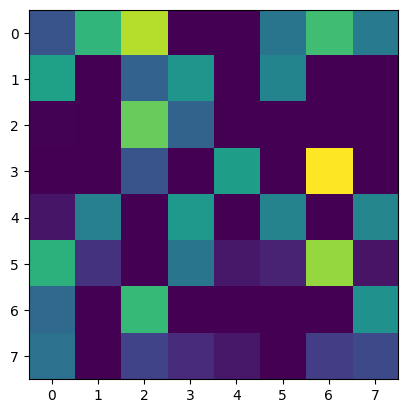

In [10]:
trial.show(model)

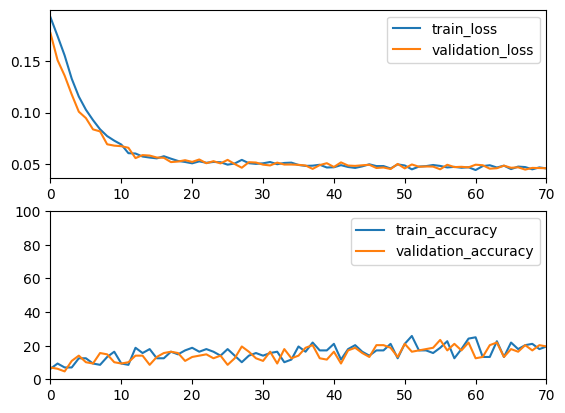

Epoch 0 : { loss: 0.046 } { val loss: 0.046 } { accuracy: 19.5 } { val accuracy: 19.5 }


In [11]:
model = TestModel(784, 64, 10)
trial = F.TrainManager()
trial.dataloader(train, test, shuffle=True)
mseloss = F.MSELoss()
trial.train_batch(model, loss_function=mseloss, epochs=1, lr=0.05, plot=True, num = 70)

  0%|          | 0/79 [00:00<?, ?it/s]

{ test accuracy: 19.4 }


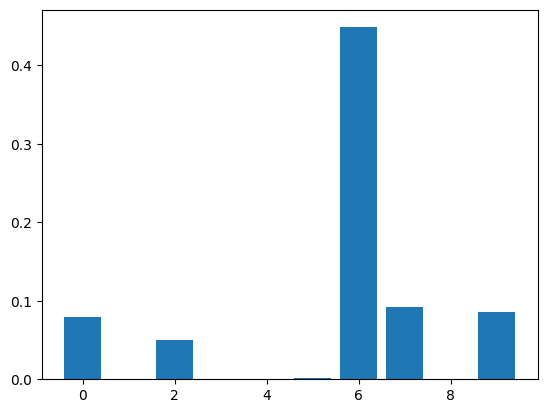

LABEL: tensor(2)


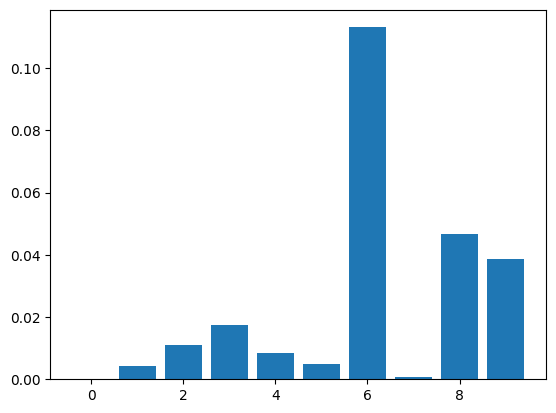

LABEL: tensor(9)


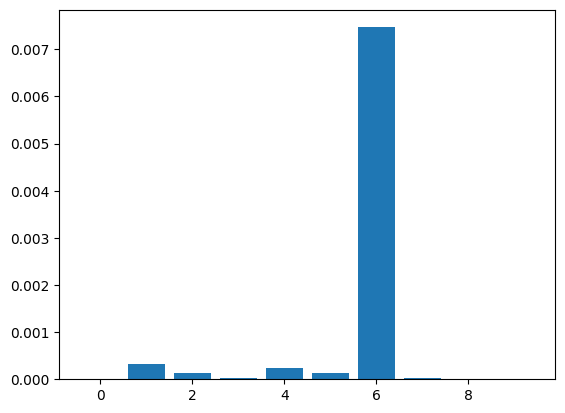

LABEL: tensor(7)


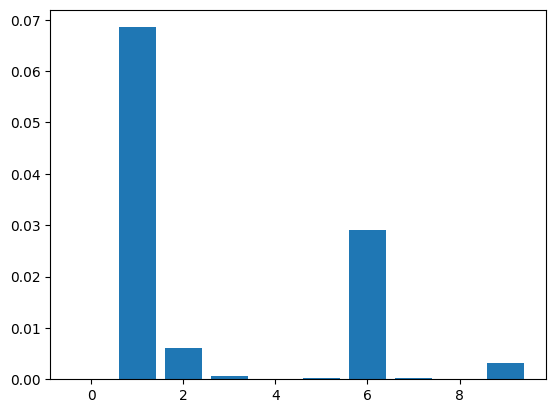

LABEL: tensor(0)


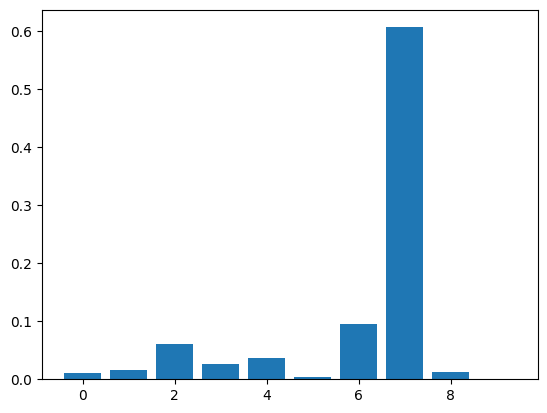

LABEL: tensor(7)


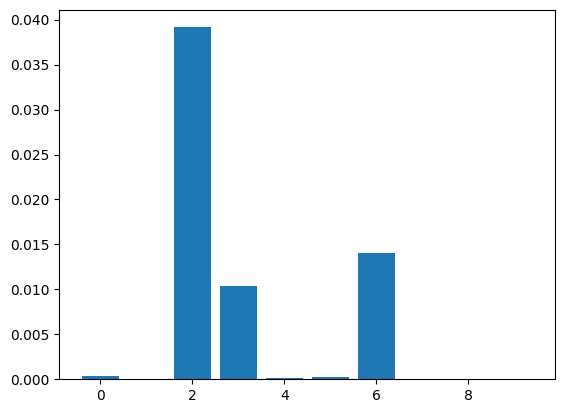

LABEL: tensor(2)


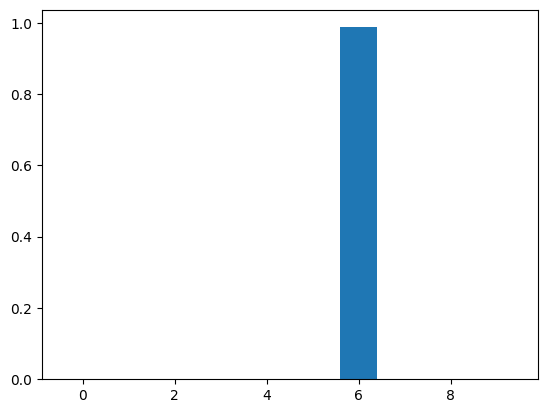

LABEL: tensor(6)


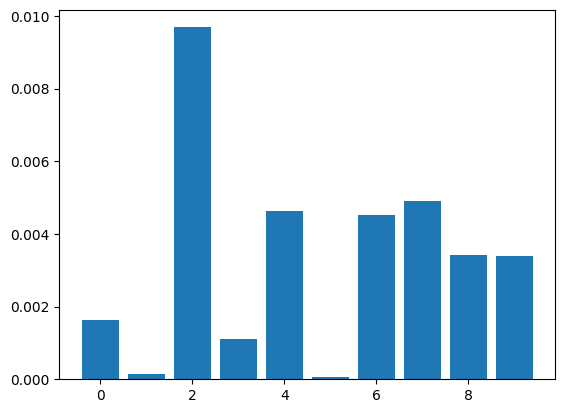

LABEL: tensor(7)


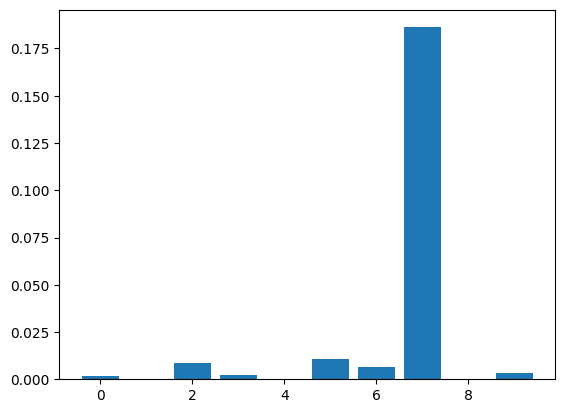

LABEL: tensor(5)


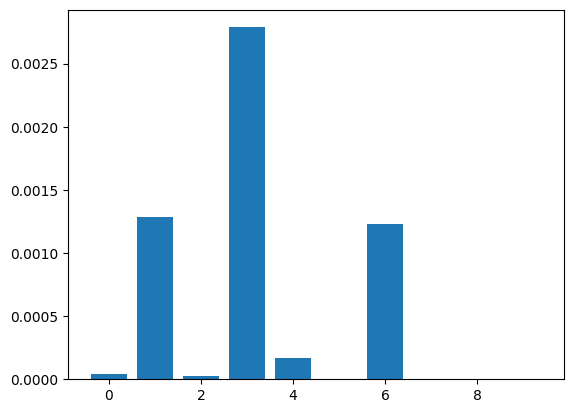

LABEL: tensor(3)


In [12]:
trial.test()

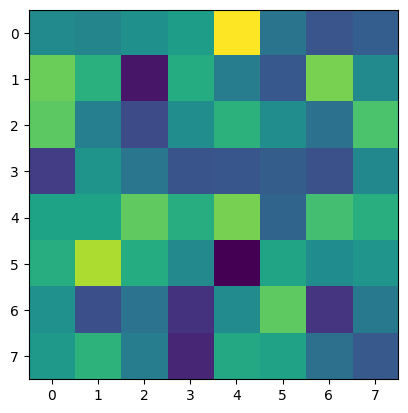

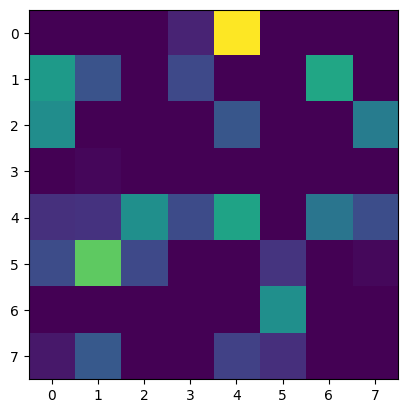

In [13]:
trial.show(model)

In [3]:
value =  torch.empty(3, 4, 5)
print(value.size())

torch.Size([3, 4, 5])
